In [115]:
from pdf2image import convert_from_path
import matplotlib.pyplot as plt

pdfs = r"C:/Users/Dell/Downloads/paper2.pdf"
pages = convert_from_path(pdfs,poppler_path=r'C:\Program Files\poppler-0.68.0\bin')

print(pages)
#plt.figure(figsize=(20,20))
#plt.imshow(pages)
i = 1
for page in pages:
    image_name = "Page_" + str(i) + ".jpg"  
    page.save(image_name, "JPEG")
    i = i+1   
    

[<PIL.PpmImagePlugin.PpmImageFile image mode=RGB size=1654x2339 at 0x27EA115D4F0>, <PIL.PpmImagePlugin.PpmImageFile image mode=RGB size=1654x2339 at 0x27EA115D550>, <PIL.PpmImagePlugin.PpmImageFile image mode=RGB size=1654x2339 at 0x27EA115DB80>, <PIL.PpmImagePlugin.PpmImageFile image mode=RGB size=1654x2339 at 0x27EA115D970>, <PIL.PpmImagePlugin.PpmImageFile image mode=RGB size=1654x2339 at 0x27EA115D9D0>, <PIL.PpmImagePlugin.PpmImageFile image mode=RGB size=1654x2339 at 0x27EA115D940>]


In [116]:
import cv2
from PIL import Image
import matplotlib.pyplot as plt

def mark_region(image_path):
    
    im = cv2.imread(image_path)

    gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray, (7,5), 0)
    thresh = cv2.adaptiveThreshold(blur,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV,11,30)

    # Dilate to combine adjacent text contours
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (9,5))
    dilate = cv2.dilate(thresh, kernel, iterations=5)
    plt.imshow(dilate)

    # Find contours, highlight text areas, and extract ROIs
    cnts = cv2.findContours(dilate, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts = cnts[0] if len(cnts) == 2 else cnts[1]

    line_items_coordinates = []
    for c in cnts:
        area = cv2.contourArea(c)
        x,y,w,h = cv2.boundingRect(c)
        """
        if y >= 600 and x <= 1000:
            if area > 10000:
                image = cv2.rectangle(im, (x,y), (2200, y+h), color=(255,0,255), thickness=3)
                line_items_coordinates.append([(x,y), (2200, y+h)])

        if y >= 2400 and x<= 2000:
            image = cv2.rectangle(im, (x,y), (2200, y+h), color=(255,0,255), thickness=3)
            line_items_coordinates.append([(x,y), (2200, y+h)])
        """
        image = cv2.rectangle(im, (x,y), (w+x, y+h), color=(255,0,255), thickness=3)
        line_items_coordinates.append([(x,y), (w+x, y+h)])

    return image, line_items_coordinates

12


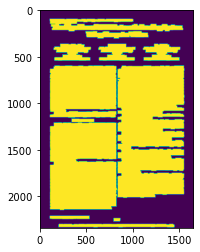

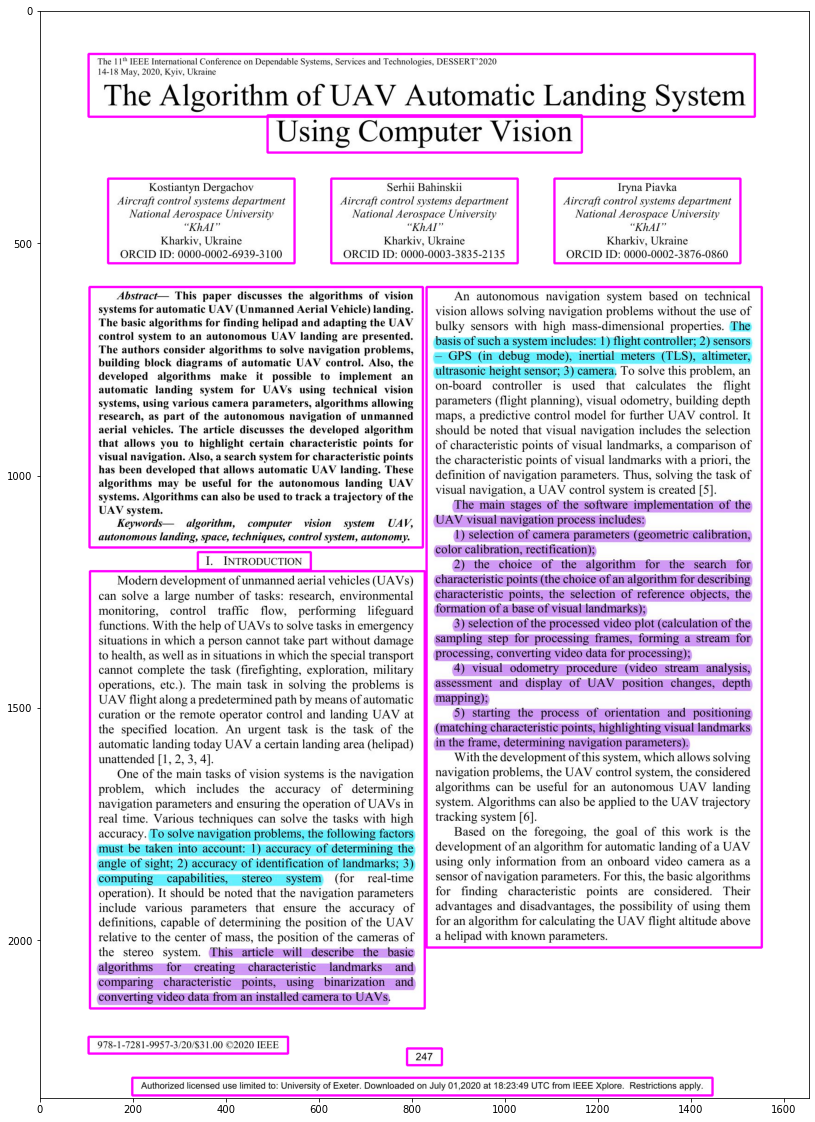

In [117]:
import cv2
import matplotlib.pyplot as plt

# [... define the mark_region method ...]

FILENAME="Page_1.jpg"
image, line_items_coordinates = mark_region(FILENAME)
plt.figure(figsize=(20,20))
plt.imshow(image)
print(len(line_items_coordinates))

Authorized licensed use limited to: University of Exeter. Downloaded on July 01,2020 at 18:23:49 UTC from IEEE Xplore. Restrictions apply.


247


978-1-7281-9957-3/20/$31.00 ©2020 IEEE


Modern development of unmanned aerial vehicles (UAVS)
can solve a large number of tasks: research, environmental
monitoring, control trafﬁc ﬂow, performing lifeguard
functions. Witl1 the help of UAVs to solve tasks in emergency
situations in which a person cannot take part without damage
to health, as well as in situations in which the special transport
cannot complete the task (ﬁreﬁghting, exploration, military
operations, etc), The main task in solving the problems is
UAV ﬂight along a predetermined path by means of automatic
curation or the remote operator control and landing UAV at
the speciﬁed location. An urgent task is the task of the
automatic landing today UAV a certain landing area (helipad)
unattended [1, 2, 3, 4].

One of the main tasks of vision systems is the navigation
problem, which in

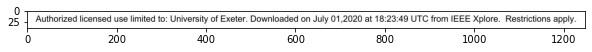

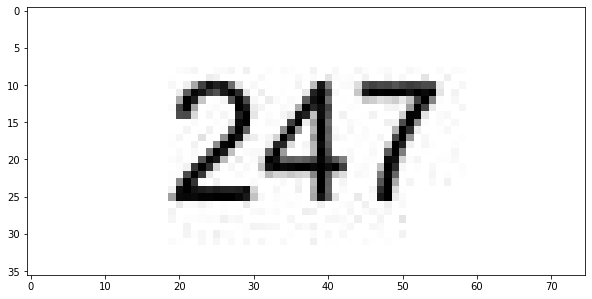

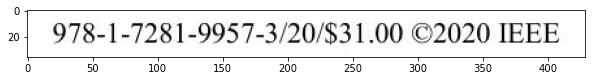

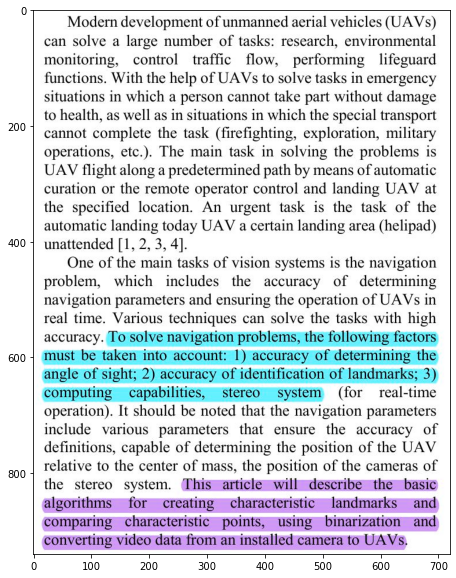

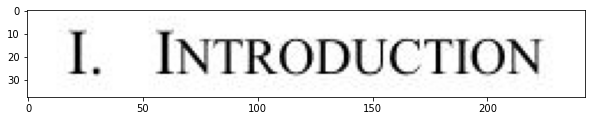

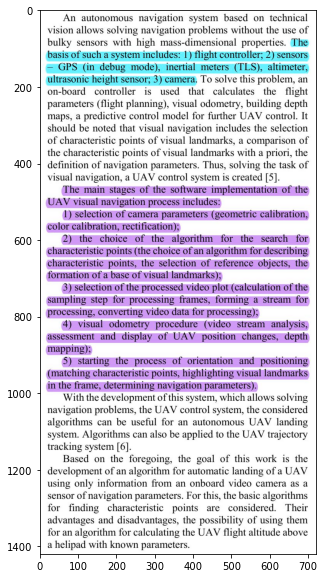

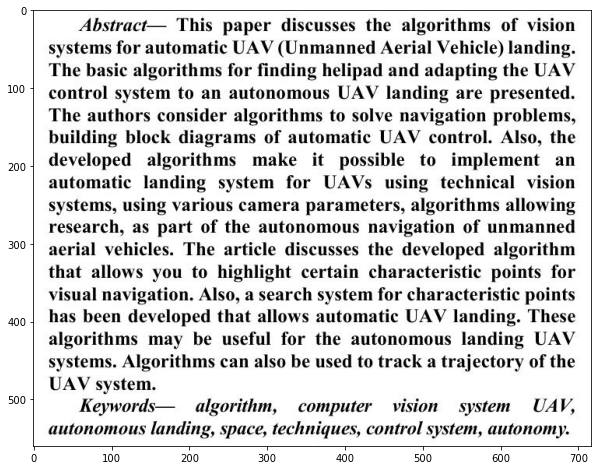

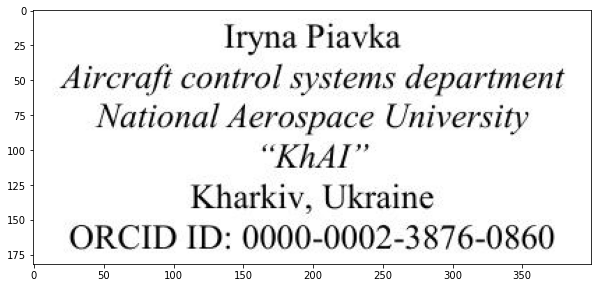

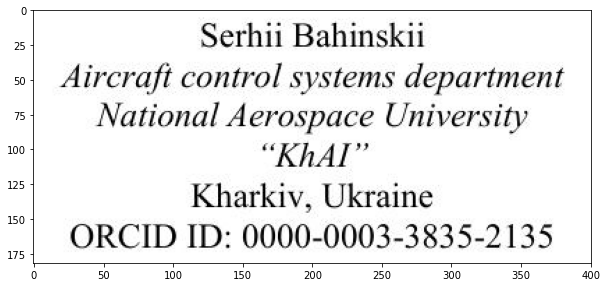

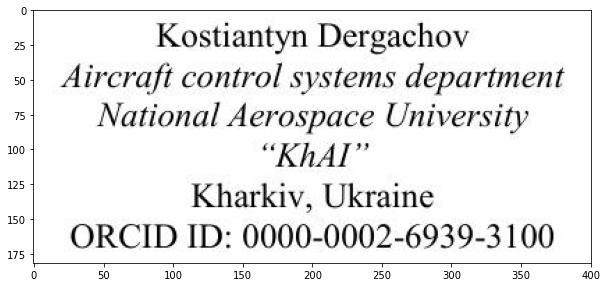

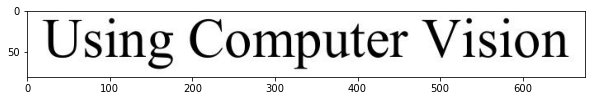

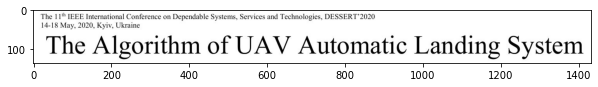

In [118]:
import pytesseract
pytesseract.pytesseract.tesseract_cmd = r'C:\\Program Files (x86)\\Tesseract-OCR\\tesseract.exe'

def printocrtext(i):
    # load the original image
    image = cv2.imread('Page_1.jpg')

    # get co-ordinates to crop the image
    c = line_items_coordinates[i]

    # cropping image img = image[y0:y1, x0:x1]
    img = image[c[0][1]:c[1][1], c[0][0]:c[1][0]]    

    plt.figure(figsize=(10,10))
    plt.imshow(img)

    # convert the image to black and white for better OCR
    ret,thresh1 = cv2.threshold(img,120,255,cv2.THRESH_BINARY)


    # pytesseract image to string to get results
    text = str(pytesseract.image_to_string(img, config='--psm 11'))
    print(text)
for i in range(len(line_items_coordinates)):
    printocrtext(i)